In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Connect Colab and Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# data = np.array(data)
# m, n = data.shape
# np.random.shuffle(data) # shuffle before splitting into dev and training sets

# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255.
# _,m_train = X_train.shape

In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [7]:
print(m,n)

42000 785


In [8]:
train_data = data[0:int(0.8*m), :]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:, 1:].T
X_train = X_train / 255.0
Y_train = train_data[:, 0]

X_val = val_data[:, 1:].T #every columns has 1 image
X_val = X_val / 255.0
Y_val = val_data[:, 0]

In [9]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 8400)
(8400,)
(784, 33600)
(33600,)


In [10]:
Y_train.shape, Y_train.size

((33600,), 33600)

In [11]:
def initialize_parameters():
  """initializing random weights also make them centrerd around zero for faster convergence """
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2

In [12]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration number:  0
Accuracy =  0.08348214285714285
Iteration number:  20
Accuracy =  0.2300297619047619
Iteration number:  40
Accuracy =  0.31214285714285717
Iteration number:  60
Accuracy =  0.3985416666666667
Iteration number:  80
Accuracy =  0.47074404761904765
Iteration number:  100
Accuracy =  0.5392261904761905
Iteration number:  120
Accuracy =  0.5975595238095238
Iteration number:  140
Accuracy =  0.6423214285714286
Iteration number:  160
Accuracy =  0.6775892857142857
Iteration number:  180
Accuracy =  0.7047619047619048
Iteration number:  200
Accuracy =  0.7253273809523809
Iteration number:  220
Accuracy =  0.7429761904761905
Iteration number:  240
Accuracy =  0.7574107142857143
Iteration number:  260
Accuracy =  0.7700892857142857
Iteration number:  280
Accuracy =  0.7810119047619047
Iteration number:  300
Accuracy =  0.7898809523809524
Iteration number:  320
Accuracy =  0.7969345238095238
Iteration number:  340
Accuracy =  0.8029464285714286
Iteration number:  360
Accuracy

Predicted label:  [8]
Actual label:  8


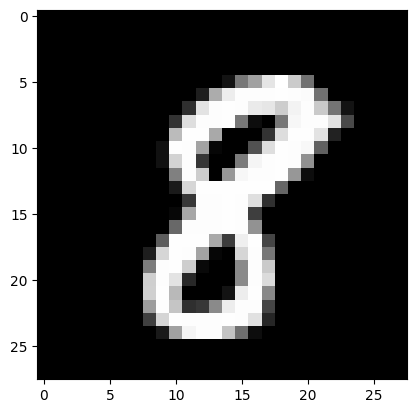

In [13]:
val_index = 12
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
print("Predicted label: ", get_predictions(A2val))
print("Actual label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.show()

In [14]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy = ", val_acc)

Validation accuracy =  0.8723809523809524


In this notebook, a simple two-layer neural network was implemented and trained on the MNIST digit recognizer dataset. This example serves to illustrate the underlying mathematics of neural networks.

---

## **Architecture Breakdown**

### **Layers**
-   **Input Layer (`A[0]`):**
    -   784 neurons (one for each pixel in the 28x28 MNIST image).
-   **First Hidden Layer (`A[1]`):**
    -   10 neurons, with **ReLU activation**.
-   **Output Layer (`A[2]`):**
    -   10 neurons, with **softmax activation** (for classification into 10 digit classes).

**This is a 2-layer neural network** (1 hidden + 1 output).

---

## **Visual Representation**
```
Input (784) → [Hidden Layer (10, ReLU)] → [Output Layer (10, softmax)] → Prediction
```



Network Architecture

| Layer Type   | Number of Neurons | Activation   |
|--------------|-------------------|--------------|
| Input        | 784               | None         |
| Hidden Layer | 10                | ReLU         |
| Output Layer | 10                | Softmax      |

In [15]:
class NeuralNet:
  def __init__(self, layer_dims, learning_rate):
    self.layer_dims = layer_dims
    self.learning_rate = learning_rate
    self.W1 = None
    self.B1 = None
    self.W2 = None
    self.B2 = None

  def initialize_parameters(self):
    """initializing random weights also make them centered around zero for faster convergence """
    self.W1 = np.random.rand(self.layer_dims[0], self.layer_dims[1]) - 0.5 # 10, 784
    self.B1 = np.random.rand(self.layer_dims[0], 1) - 0.5 # 10, 1
    self.W2 = np.random.rand(self.layer_dims[2], self.layer_dims[0]) - 0.5 # 10, 10
    self.B2 = np.random.rand(self.layer_dims[2], 1) - 0.5 # 10, 1

  @staticmethod
  def ReLU(X):
    return np.maximum(X, 0)

  @staticmethod
  def softmax_calculator(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

  @staticmethod
  def one_hot_converter(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

  def forward_propagation(self, X):
    Z1 = self.W1.dot(X) + self.B1
    A1 = self.ReLU(Z1)
    Z2 = self.W2.dot(A1) + self.B2
    A2 = self.softmax_calculator(Z2)
    return Z1, A1, Z2, A2

  def backward_propagation(self, Z1, A1, Z2, A2, X, Y):
    m = X.shape[1]
    one_hot_Y = self.one_hot_converter(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = self.W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

  def update_parameters(self, dW1, dB1, dW2, dB2):
    self.W1 = self.W1 - self.learning_rate * dW1
    self.B1 = self.B1 - self.learning_rate * dB1
    self.W2 = self.W2 - self.learning_rate * dW2
    self.B2 = self.B2 - self.learning_rate * dB2

  @staticmethod
  def get_predictions(A2):
    return np.argmax(A2, 0)

  @staticmethod
  def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

  def train(self, X_train, Y_train, iterations):
    self.initialize_parameters()

    for i in range(iterations):
      Z1, A1, Z2, A2 = self.forward_propagation(X_train)
      dW1, dB1, dW2, dB2 = self.backward_propagation(Z1, A1, Z2, A2, X_train, Y_train)
      self.update_parameters(dW1, dB1, dW2, dB2)

      if (i % 20) == 0:
        print(f"Iteration number: {i}")
        predictions = self.get_predictions(A2)
        accuracy = self.get_accuracy(predictions, Y_train)
        print(f"Accuracy = {accuracy}")

  def predict(self, X):
    _, _, _, A2 = self.forward_propagation(X)
    return self.get_predictions(A2)

In [16]:
model = NeuralNet(layer_dims=[10, 784, 10], learning_rate=0.1)
model.train(X_train, Y_train, iterations=1000)

Iteration number: 0
Accuracy = 0.08592261904761905
Iteration number: 20
Accuracy = 0.258125
Iteration number: 40
Accuracy = 0.3186607142857143
Iteration number: 60
Accuracy = 0.3580952380952381
Iteration number: 80
Accuracy = 0.3955059523809524
Iteration number: 100
Accuracy = 0.43836309523809525
Iteration number: 120
Accuracy = 0.48875
Iteration number: 140
Accuracy = 0.530625
Iteration number: 160
Accuracy = 0.5649404761904762
Iteration number: 180
Accuracy = 0.5970535714285714
Iteration number: 200
Accuracy = 0.6252678571428572
Iteration number: 220
Accuracy = 0.6564285714285715
Iteration number: 240
Accuracy = 0.6808035714285714
Iteration number: 260
Accuracy = 0.7005654761904762
Iteration number: 280
Accuracy = 0.7175
Iteration number: 300
Accuracy = 0.7321130952380952
Iteration number: 320
Accuracy = 0.7436904761904762
Iteration number: 340
Accuracy = 0.7535416666666667
Iteration number: 360
Accuracy = 0.7634226190476191
Iteration number: 380
Accuracy = 0.7732440476190476
Iterati

In [17]:
predictions = model.predict(X_val)
val_accuracy = model.get_accuracy(predictions, Y_val)
print(f"Validation accuracy: {val_accuracy}")

Validation accuracy: 0.8673809523809524


Predicted label for image at index 0: 6
Actual label for image at index 0: 6


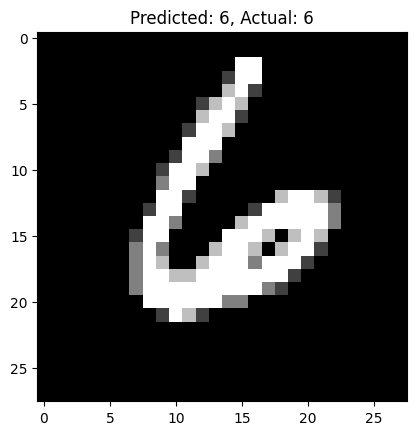

In [18]:
val_index = 0
image_to_predict = X_val[:, val_index, None]
predicted_label = model.predict(image_to_predict)
actual_label = Y_val[val_index]

print(f"Predicted label for image at index {val_index}: {predicted_label[0]}")
print(f"Actual label for image at index {val_index}: {actual_label}")

image_array = X_val[:, val_index].reshape(28, 28)
plt.imshow(image_array, cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")
plt.show()

In [24]:
import numpy as np


class NeuralNet:
    def __init__(self, layer_dims, eta=0.1):
        """Simple 2-layer neural network helper.
        """
        self.layer_dims = tuple(layer_dims)
        self.learning_rate = eta
        self.W1 = None
        self.W2 = None
        self.B1 = None
        self.B2 = None

    def init_params(self):
        """
        Z = WX + B => (10 X m ) => for a single image it'll be of 10 * 1
        if X = (784,m) => W => (10, 784) + B
        """
        self.W1 = np.random.rand(self.layer_dims[0], self.layer_dims[1]) - 0.5 # 10, 784
        self.B1 = np.random.rand(self.layer_dims[0], 1) - 0.5 # 10, 1
        self.W2 = np.random.rand(self.layer_dims[2], self.layer_dims[0]) - 0.5 # 10, 10
        self.B2 = np.random.rand(self.layer_dims[2], 1) - 0.5 # 10, 1
        return self.W1, self.W2, self.B1, self.B2

    @staticmethod
    def ReLU(Z):
        """Element-wise ReLU activation."""
        return np.maximum(0, Z)

    @staticmethod
    def softmax(Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=0)

    def forward_prop(self, X):
        """Forward pass using instance parameters. Returns Z1, A1, Z2, A2."""
        if any(v is None for v in (self.W1, self.W2, self.B1, self.B2)):
            # lazy init
            self.W1, self.W2, self.B1, self.B2 = self.init_params()

        Z1 = self.W1.dot(X) + self.B1
        A1 = NeuralNet.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.B2
        A2 = NeuralNet.softmax(Z2)
        return Z1, A1, Z2, A2

    @staticmethod
    def ReLU_deriv(Z):
        """Derivative of ReLU (returns 0/1 mask)."""
        return (Z > 0).astype(float)

    @staticmethod
    def one_hot_converter(Y):
        """Convert vector Y (shape (m,)) to one-hot matrix of shape (num_classes, m)."""
        one_hot_Y = np.zeros((np.max(Y) + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y


    def backward_prop(self, Z1, A1, Z2, A2, X, Y):
        """Compute gradients for a batch X (shape n_x x m) and labels Y (m,).

        Returns dW1, db1, dW2, db2 with shapes matching parameters.
        """
        m = X.shape[1]
        one_hot_Y = NeuralNet.one_hot_converter(Y)  # shape (n_y, m)

        dZ2 = A2 - one_hot_Y
        dW2 = (1.0 / m) * dZ2.dot(A1.T)
        db2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = self.W2.T.dot(dZ2) * NeuralNet.RELU_deriv_safe(Z1)
        dW1 = (1.0 / m) * dZ1.dot(X.T)
        db1 = (1.0 / m) * np.sum(dZ1, axis=1, keepdims=True)

        return dW1, db1, dW2, db2

    # helper wrapper for derivative name compatibility
    @staticmethod
    def RELU_deriv_safe(Z):
        return NeuralNet.ReLU_deriv(Z)

    def update_parameters(self, dW1, dB1, dW2, dB2):
        self.W1 = self.W1 - self.learning_rate * dW1
        self.B1 = self.B1 - self.learning_rate * dB1
        self.W2 = self.W2 - self.learning_rate * dW2
        self.B2 = self.B2 - self.learning_rate * dB2


    def fit(self, X, Y, iters=1000, verbose=True):
        """
        gradient descent

        1. forward pass
        2. backward pass
        3. update params
        """
        for i in range(iters):
            Z1, A1, Z2, A2 = self.forward_prop(X)
            dW1, db1, dW2, db2 = self.backward_prop(Z1, A1, Z2, A2, X, Y)
            self.update_parameters(dW1, db1, dW2, db2)

            if verbose and (i % 20) == 0:
                predictions = NeuralNet.get_predictions(A2)
                accuracy = self.get_accuracy(predictions, Y)
                print(f"Iteration {i:5d} - accuracy: {accuracy:.4f}")

    @staticmethod
    def get_predictions(A2):
        """Return prediction vector (m,) from output activations A2 (n_y x m)."""
        return np.argmax(A2, axis=0)

    def predict(self, X):
        _, _, _, A2 = self.forward_prop(X)
        return NeuralNet.get_predictions(A2)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    @classmethod
    def from_layer_dims(cls, layer_dims, eta=0.1):
        """Factory that returns an instance with initialized parameters."""
        net = cls(layer_dims, eta=eta)
        net.W1, net.W2, net.B1, net.B2 = net.init_params()
        return net


In [25]:
# Using the factory method
model = NeuralNet.from_layer_dims(layer_dims=[10, 784, 10], eta=0.1)

In [26]:
model.fit(X_train, Y_train, iters=1000, verbose=True)

Iteration     0 - accuracy: 0.1287
Iteration    20 - accuracy: 0.2738
Iteration    40 - accuracy: 0.4526
Iteration    60 - accuracy: 0.5511
Iteration    80 - accuracy: 0.6125
Iteration   100 - accuracy: 0.6599
Iteration   120 - accuracy: 0.6932
Iteration   140 - accuracy: 0.7201
Iteration   160 - accuracy: 0.7411
Iteration   180 - accuracy: 0.7582
Iteration   200 - accuracy: 0.7710
Iteration   220 - accuracy: 0.7830
Iteration   240 - accuracy: 0.7924
Iteration   260 - accuracy: 0.7996
Iteration   280 - accuracy: 0.8070
Iteration   300 - accuracy: 0.8140
Iteration   320 - accuracy: 0.8201
Iteration   340 - accuracy: 0.8254
Iteration   360 - accuracy: 0.8298
Iteration   380 - accuracy: 0.8336
Iteration   400 - accuracy: 0.8375
Iteration   420 - accuracy: 0.8410
Iteration   440 - accuracy: 0.8448
Iteration   460 - accuracy: 0.8475
Iteration   480 - accuracy: 0.8505
Iteration   500 - accuracy: 0.8531
Iteration   520 - accuracy: 0.8558
Iteration   540 - accuracy: 0.8587
Iteration   560 - ac

Randomly selected index: 4908
Predicted label for image at index 4908: 6
Actual label for image at index 4908: 6



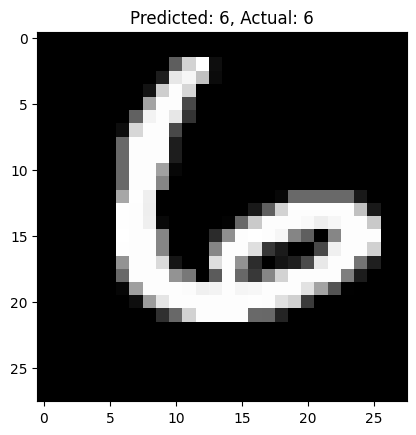

Randomly selected index: 7075
Predicted label for image at index 7075: 8
Actual label for image at index 7075: 8



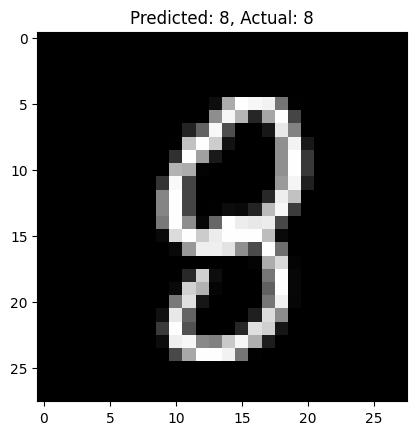

Randomly selected index: 2039
Predicted label for image at index 2039: 3
Actual label for image at index 2039: 9



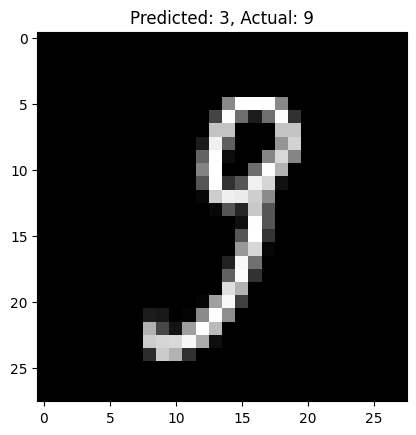

Randomly selected index: 1041
Predicted label for image at index 1041: 3
Actual label for image at index 1041: 2



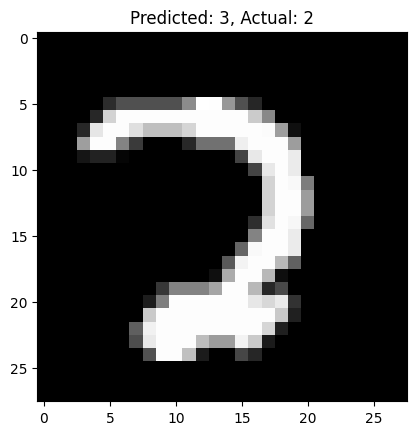

Randomly selected index: 130
Predicted label for image at index 130: 5
Actual label for image at index 130: 5



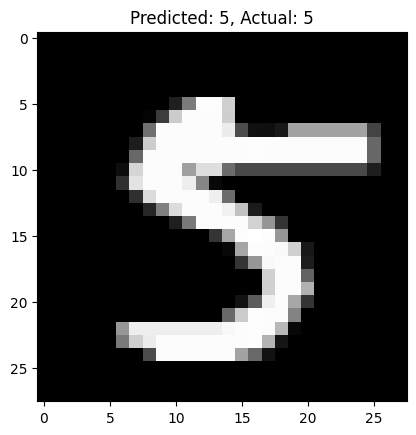

Randomly selected index: 6629
Predicted label for image at index 6629: 8
Actual label for image at index 6629: 8



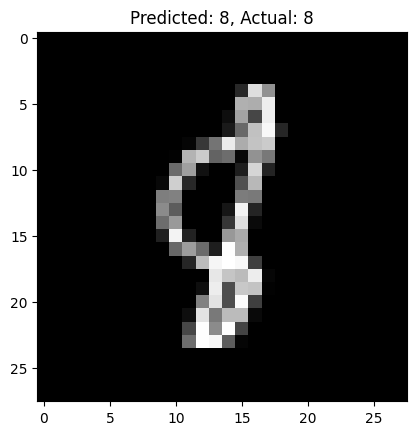

Randomly selected index: 3135
Predicted label for image at index 3135: 7
Actual label for image at index 3135: 7



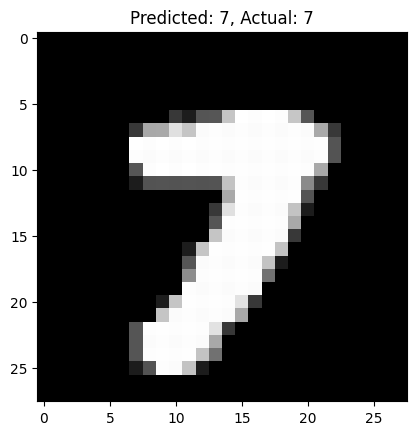

Randomly selected index: 1256
Predicted label for image at index 1256: 2
Actual label for image at index 1256: 2



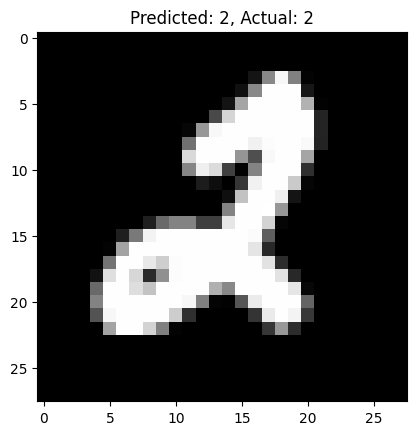

Randomly selected index: 6846
Predicted label for image at index 6846: 6
Actual label for image at index 6846: 6



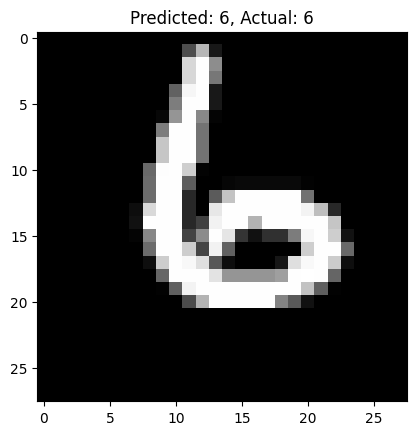

Randomly selected index: 6259
Predicted label for image at index 6259: 1
Actual label for image at index 6259: 1



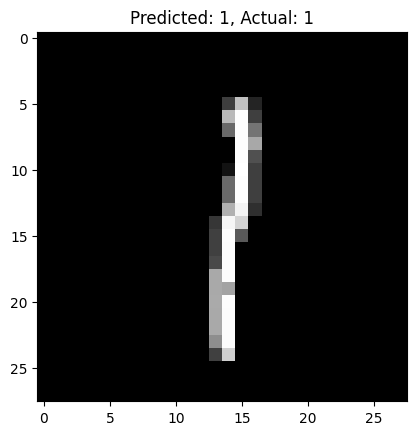

In [34]:
# randomly simulate this
for i in range (10):
  val_index = np.random.randint(X_val.shape[1])
  print(f"Randomly selected index: {val_index}")
  image_to_predict = X_val[:, val_index, None]
  predicted_label = model.predict(image_to_predict)
  actual_label = Y_val[val_index]

  print(f"Predicted label for image at index {val_index}: {predicted_label[0]}")
  print(f"Actual label for image at index {val_index}: {actual_label}\n")

  image_array = X_val[:, val_index].reshape(28, 28)
  plt.imshow(image_array, cmap='gray')
  plt.title(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")
  plt.show()